# 本项目基于OPENCV库，使用多种分割方法结合实现人像分割
+ 何长鸿
+ 2016141482154

In [92]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.measure import label
import pylab
pylab.rcParams['figure.figsize'] = (20.0, 5.0)

### 读取原始rgb图像，并转化为gbr,hls,gray色彩空间,并显示原图像

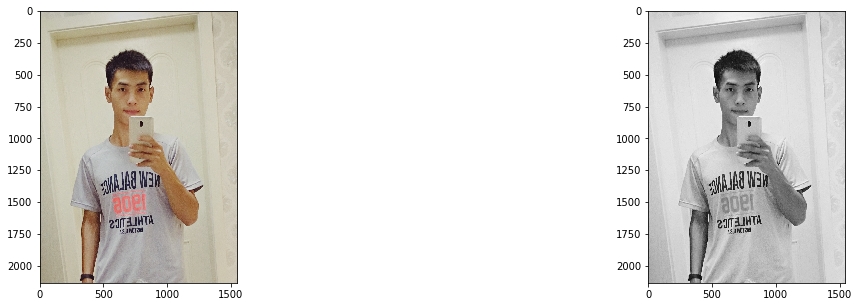

In [23]:
rgb = cv2.imread('./hch.jpg')
gbr = cv2.cvtColor(rgb, cv2.COLOR_RGB2BGR)
gray = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)
hls = cv2.cvtColor(rgb,cv2.COLOR_RGB2HLS)
fg = plt.figure()
fg.add_subplot(121)
plt.imshow(gbr)
fg.add_subplot(122)
plt.imshow(gray,cmap='gray')

### （失败方法）此图中由于灰度化后衣服与北京灰度相似，因此不便于使用灰度图分割，以下为尝试灰度图最大类间方差二值化

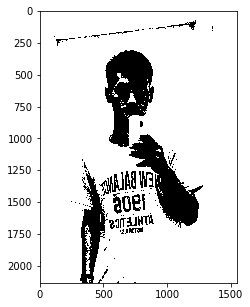

In [24]:
ret,outer = cv2.threshold(gray,0,1,cv2.THRESH_OTSU)
plt.imshow(outer,cmap='gray')

### 画出HSL颜色空间图像的各分量直方图(从左到右依次为H、L、S分量)

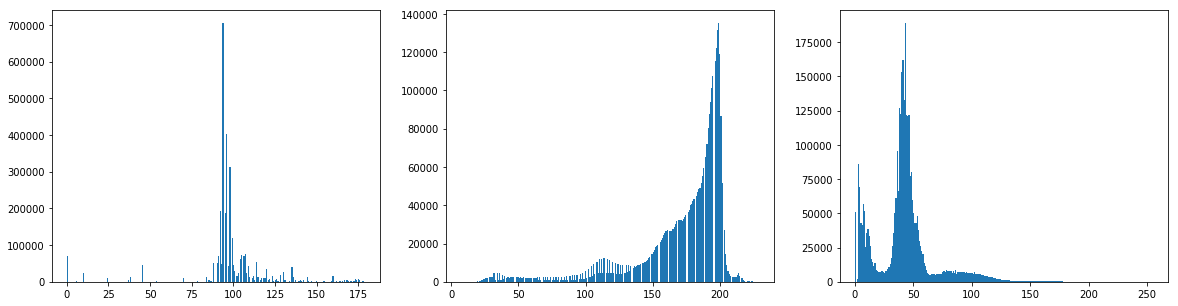

In [29]:
fg = plt.figure()
fg.add_subplot(131)
r = plt.hist(hls[:,:,0].flatten(),bins=255)
fg.add_subplot(132)
r = plt.hist(hls[:,:,1].flatten(),bins=255)
fg.add_subplot(133)
r = plt.hist(hls[:,:,2].flatten(),bins=255)

### 从上图看出S分量与L分量有相对明显的聚合，因此使用这个特点进行阈值法分割，下面筛选出人像像素

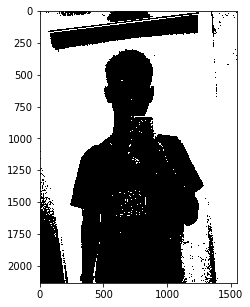

In [87]:
mask = cv2.inRange(hls,np.array([0,175,25]),np.array([255,250,69]))
plt.imshow(mask,cmap='gray')

### 上图中虽然筛选出了人像，但含有较多的噪点以及其他较大的连通区域，且人像中有漏掉的像素点，解决方案如下：

1. 通过计算最大的连通域筛选出人像
2. 对于噪点和漏掉的像素点，使用中值滤波法去除，从而加快其它连通域计算速度
3. 对于人像中漏掉的噪点

### 对以上二值图进行中值滤波

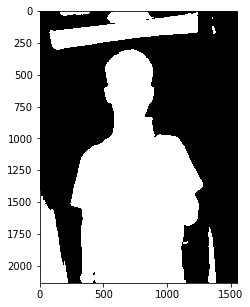

In [135]:
media = 255 - cv2.medianBlur(mask,25)
plt.imshow(media,cmap='gray')

### 选出最大连通域

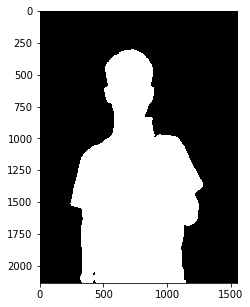

In [176]:
labels = label(media,connectivity=2)  ## 八连通
index,max_count = 0,0
for i in range(1,np.max(labels)+1):
    if len(labels[labels==i])>max_count:
        index = i
        max_count = len(labels[labels==i])

labels[labels==index] = 255 
labels[labels!=255] = 0
plt.imshow(labels,cmap='gray')

### 逻辑与提取原图中的人像·

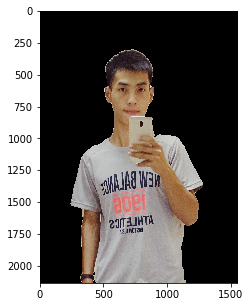

In [175]:
mask = np.zeros(gbr.shape,np.uint8)
for i in range(3):
    mask[:,:,i] = labels
to_show = cv2.bitwise_and(gbr,mask)
plt.imshow(to_show)